# Interpolación. Integración numérica: métodos del Trapacio y Simpson.

# Interpolación de Lagrange.


### Ejercicio 2. Sea $P(x)$ el polinomio interpolador de Lagrange de  $f(x)=\sin(x)+2\cos(x)$ en los nodos 
### $$ p_k=1+k\cdot \frac{2}{7} \qquad(k=0,1,\dots,7) $$ 
### [a] Calcula $P(x)$ y represéntalo gráficamente junto con $f(x)$ en el intervalo $[1,3]$. 

### [b] Calcula una cota superior teórica para el error $|f (x) − P (x)|$ en el intervalo $[1, 3]$

### [c] Representa gráficamente la “función error” $|f (x) − P (x)|$ en el intervalo $[1, 3]$, comprobando que es menor que la cota obtenida en el apartado (b).

SOLUCIÓN

## (a) Calcula $P(x)$ y represéntalo gráficamente junto con $f(x)$ en el intervalo $[1,3]$.

Vamos a definir la función $f$ y el conjunto de nodos $X$ con el que estamos trabajando. Por último, $XY$, será el conjunto de puntos por los que tendremos que definir el polinomio de interpolación de Lagrange.

Comenzamos definiendo la función $f(x)=\sin(x)+2\cos(x)$:

In [1]:
f(x)=sin(x)+2*cos(x)
f

x |--> 2*cos(x) + sin(x)

Los nodos 
 $$ p_k=1+k\cdot \frac{2}{7} \qquad(k=0,1,\dots,7) $$ 
 son:

In [2]:
n=7

In [3]:
X=[1+k*2/7 for k in range(0,n+1)]
X

[1, 9/7, 11/7, 13/7, 15/7, 17/7, 19/7, 3]

La malla de puntos donde vamos a interpolar es
$$(p_0,f(p_0)), \quad (p_1,f(p_1)), \quad ...\quad,(p_n,f(p_n))$$
que este caso concreto ($n=7$) son:

In [4]:
XY=[(X[k],f(X[k])) for k in range(0,n+1)]
XY

[(1, 2*cos(1) + sin(1)),
 (9/7, 2*cos(9/7) + sin(9/7)),
 (11/7, 2*cos(11/7) + sin(11/7)),
 (13/7, 2*cos(13/7) + sin(13/7)),
 (15/7, 2*cos(15/7) + sin(15/7)),
 (17/7, 2*cos(17/7) + sin(17/7)),
 (19/7, 2*cos(19/7) + sin(19/7)),
 (3, 2*cos(3) + sin(3))]

<p>Usamos el operador <strong>lagrange_polynomial</strong> para obtener el polinomio interpolador de Lagrange en los puntos dados, y lo llamamos "P":</p>

In [5]:
P=RR['x'].lagrange_polynomial(XY); show(P)

0.000432961626487957*x^7 - 0.00616518300242504*x^6 + 0.0189955629133166*x^5 + 0.0619330424956689*x^4 - 0.138859804318597*x^3 - 1.02268719058235*x^2 + 1.01057067042186*x + 1.99785553699021

<p>Podemos representar conjuntamente la función, el polinomio interpolador y los puntos:</p>

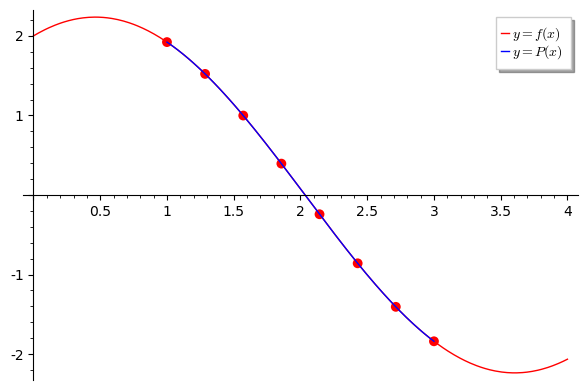

In [6]:
point2d(XY,size=50,color='red')+plot(f,0,4,color='red',legend_label='$y=f(x)$')+plot(P(x),(x,1,3),legend_label='$y=P(x)$',color='blue')

### (b)  Calcula una cota superior teórica para el error $|f(x) − P(x)|$ en el intervalo $[1, 3]$

Para calcular una cota superior teórica del error debemos tener en cuenta que si $M>0$ cumple $\big|f^{(n+1)}(x)\big|\leq M$ para todo $x\in [x_0,x_n]$ entonces 
    $$\big|f(x)-P(x)\big| \leq \dfrac{M}{(n+1)!}\prod_{i=0}^n|x-x_i|\,$$
para todo $x\in [x_0,x_n]$.

Para calcularla debemos tener en cueta que:
$$| x-x_0|\leq |b-a|,\quad | x-x_1|\leq |b-a|, \quad ... \quad, | x-x_n|\leq |b-a|$$
para todo $x\in [x_0,x_n]=[a,b]$.

Con lo cual  $$\prod_{i=0}^n|x-x_i|=|x-x_0|·|x-x_1|·...·|x-x_n|\leq |b-a|·|b-a|·...·|b-a|=|b-a|^{n+1}$$  para todo $x\in [x_0,x_n]=[a,b]$, 

De aquí se deduce que: 
$$
\big|f(x)-P(x)\big| \leq \dfrac{M}{(n+1)!}\prod_{i=0}^n|x-x_i|\, \leq \dfrac{M}{(n+1)!}(b-a)^{n+1} \quad\mbox{para todo }x\in [a,b].\,$$ 
Por último, la <strong>cota superior numérica del error<strong> es:
$$
	\boxed{\dfrac{M}{(n+1)!}(b-a)^{n+1}}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$ 

Comenzamos acotando la derivada $(n+1)-$ésima de $f$

In [7]:
diff(f,x,n+1)

x |--> 2*cos(x) + sin(x)

In [8]:
a=1
b=3

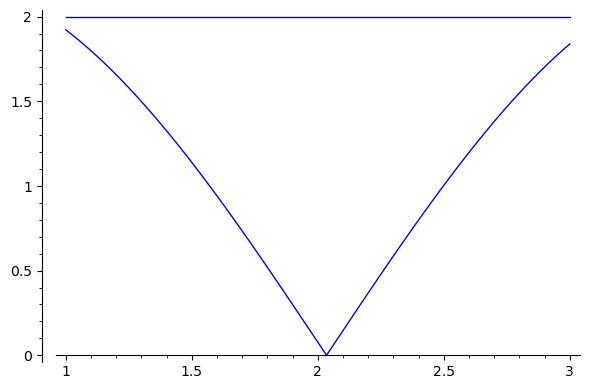

In [9]:
plot(abs(diff(f,x,n+1)),a,b)+plot(2,a,b)

<p>Por lo que $M=2$. Además como $$\prod_{i=0}^7|x-x_i|\leq (b-a)^{n+1}=(3-1)^8=2^8$$  para todo $x$ en el intervalo, se tiene que: $$
\big|f(x)-P(x)\big| \leq \dfrac{2}{(7+1)!}\prod_{i=0}^7|x-x_i|\, \leq \dfrac{2}{(7+1)!}2^8 = \dfrac{2^9}{8!} \quad\mbox{para todo }x\in [1,3].\,$$ 


In [10]:
cota=2^9/factorial(8)
cota,cota.n()

(4/315, 0.0126984126984127)

### (c) Representa gráficamente la "función error" $|f(x)-P(x)|$ en el intervalo del problema, comprobando que es menor que la cota obtenida en el apartado (b). 

La <strong>función error real</strong> es
$$
	\boxed{| f(x)-P(x)|}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$

La <strong>función cota del error</strong> es:
$$
	\boxed{error(x)=\dfrac{M}{(n+1)!}\prod_{i=0}^n| {x}-x_i|}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$
Por último, la <strong>cota superior numérica del error</strong> es:
$$
	\boxed{cota=\dfrac{M}{(n+1)!}(b-a)^{n+1}}
	\quad
	\mbox{para todo } {x}\in [a,b].
$$
En nuestro caso particular, la función cota del error es:

In [11]:
M=2
error(x)=M/factorial(n+1)*prod([abs(x-X[k]) for k in range(0,n+1) ]);
show(error)

x |--> 1/20160*abs(x - 1)*abs(x - 9/7)*abs(x - 11/7)*abs(x - 13/7)*abs(x - 15/7)*abs(x - 17/7)*abs(x - 19/7)*abs(x - 3)

En los siguientes gráficos vemos que tanto la cota numérica como la función error nos dan cotas muy "groseras".

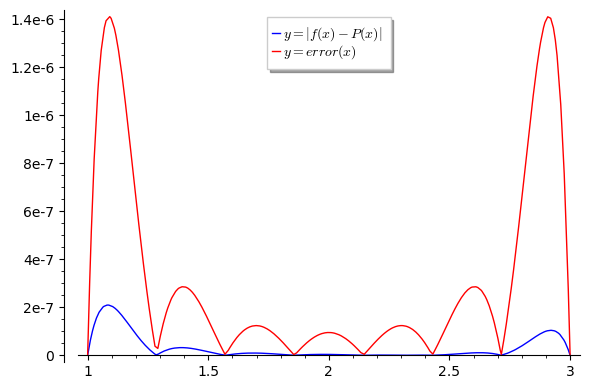

In [12]:
plot(abs(f(x)-P(x)),a,b,legend_label='$y=|f(x)-P(x)|$')+plot(error,a,b,legend_label='$y=error(x)$',color='red')

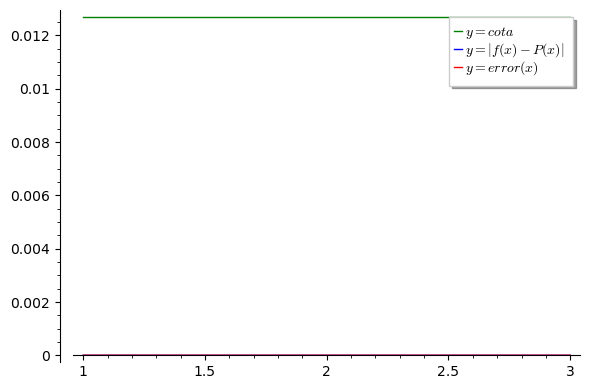

In [13]:
plot(cota,a,b,color='green',legend_label='$y=cota$')+plot(abs(f(x)-P(x)),a,b,legend_label='$y=|f(x)-P(x)|$')+plot(error,a,b,legend_label='$y=error(x)$',color='red')